#### Introduction

This dataset captures comprehensive information about the artificial intelligence and machine learning job market, containing 2,000 job postings spanning from 2023 to 2025 across multiple industries and geographic locations. Each record represents a unique AI-related job opportunity, providing detailed insights into hiring trends, compensation structures, and technical requirements.

The dataset includes variables such as job titles, industry sectors, employment types, company sizes, and experience levels. Critically, it contains salary information (minimum, maximum, and average salary), location data with remote work indicators, and timestamped posting dates for temporal analysis. Additionally, it provides rich information about technical requirements through skills_required (Python, PyTorch, TensorFlow, SQL, etc.) and tools_preferred (FastAPI, BigQuery, MLflow, etc.).

The objective of analyzing this dataset is to uncover patterns in the AI job market, identify the most in-demand skills and tools, understand salary distributions across different dimensions, and reveal industry-specific preferences. By examining correlations between job characteristics and compensation, this analysis aims to provide actionable insights for both job seekers navigating career opportunities and organizations seeking to attract top AI talent.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df=pd.read_csv("D:\\Data Analyst\\Project\\ai_job_market.csv")

# D:\\Shamsudheen\\Downloads\\ai_job_market.csv

In [4]:
print(df.head())


   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0       Full-time        

In [5]:
# Check whether there are any missing values
print(df.isna().sum())

job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64


In [6]:
# Remove spaces from column names

df.columns=df.columns.str.replace(' ','_')

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

#### Data Understanding

In [8]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB
None


In [9]:
# Use summary statistics to understand distributions.
print(df.describe())

            job_id
count  2000.000000
mean   1000.500000
std     577.494589
min       1.000000
25%     500.750000
50%    1000.500000
75%    1500.250000
max    2000.000000


### Outlier Detection

Index(['job_id', 'company_name', 'industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred'],
      dtype='object')


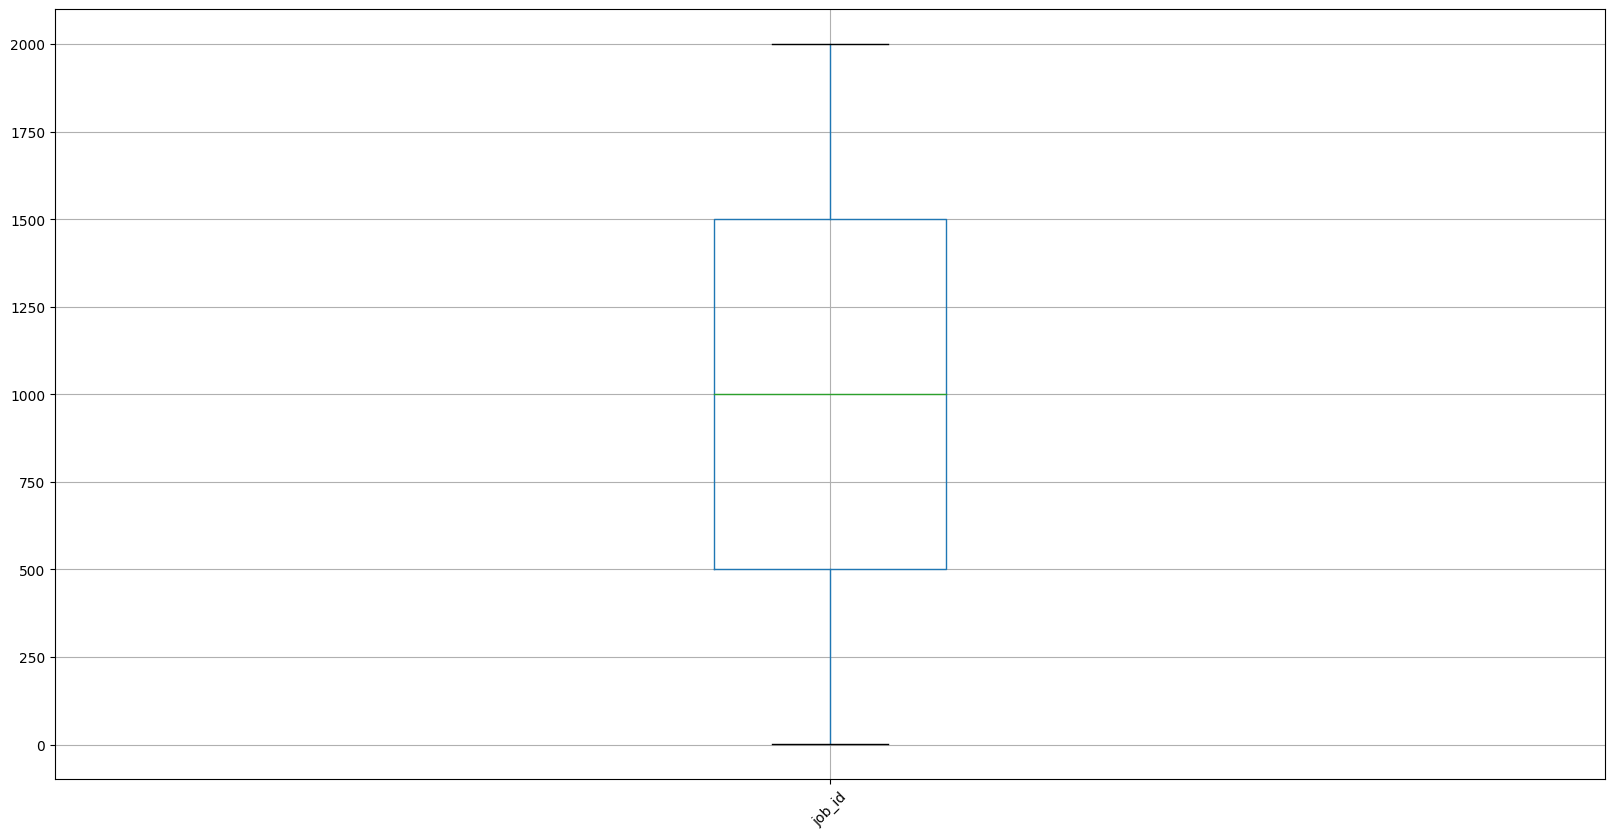

In [10]:
# plot boxplot for checking outliers
print(df.columns)
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

## Basic Understanding Questions

What are the most common job titles in the AI job market? Which positions (Data Analyst, ML Engineer, NLP Engineer, etc.) have the highest number of openings?

Which industries are hiring the most AI/ML professionals? Analyze the distribution of job postings across different industry sectors (Tech, Healthcare, Finance, Automotive, Education, Retail, E-commerce). Create a pie chart showing the percentage breakdown of postings by industry.

What is the distribution of job postings across different experience levels (Entry-level, Mid-level, Senior)?  Create a pie chart showing the percentage distribution of experience levels.

Which employment types are most common? Compare Full-time, Remote, Contract, and Internship positions.

Salary Analysis Questions
What is the average salary range for each experience level? Do Senior positions earn significantly more than Entry-level? (You'll need to extract min/max values from the salary_range_usd column)

Create a bar plot that visualizes the average salary for each experience level

Which job titles offer the highest salaries? Compare average salaries across Data Scientist, ML Engineer, Quant Researcher, etc. Create a horizontal bar chart to visualize the top-paying roles.

Do larger companies pay more than startups? Compare salary distributions across company_size (Large, Mid, Startup). Use a box plot to show the salary distribution for each company size.

Skills & Tools Analysis
What are the most in-demand technical skills? Which skills appear most frequently in skills_required (Python, PyTorch, TensorFlow, SQL, etc.)? Create a horizontal bar chart showing the top 15 skills.

Which tools are preferred by different industries? Do Tech companies prefer different tools (FastAPI, BigQuery, MLflow) compared to Healthcare or Finance? Use a grouped bar chart to compare tool preferences across industries.

Time-Based Analysis
How has job posting activity changed over time? Are there more postings in 2024-2025 compared to 2023? Are certain months more active for hiring? Create a line plot showing monthly posting trends and a bar chart comparing yearly totals.

These questions will guide you through univariate analysis (questions 1-4), bivariate analysis (questions 5-9), and time-series analysis (question 10), 

In [11]:
#What are the most common job titles in the AI job market? Which positions (Data Analyst, 
# ML Engineer, NLP Engineer, etc.) have the highest number of openings?


grouped=df.groupby('job_title')
grouped_with_count=grouped.agg(count_job_title=('job_title','count'))
grouped_with_count.sort_values(by=['count_job_title'],ascending=False) 


,count_job_title
job_title,
Data Analyst,271
NLP Engineer,265
AI Product Manager,258
Quant Researcher,251
ML Engineer,250
Data Scientist,238
AI Researcher,237
Computer Vision Engineer,230


Automotive    300
Education     294
Retail        293
E-commerce    291
Finance       279
Tech          274
Healthcare    269
Name: industry, dtype: int64


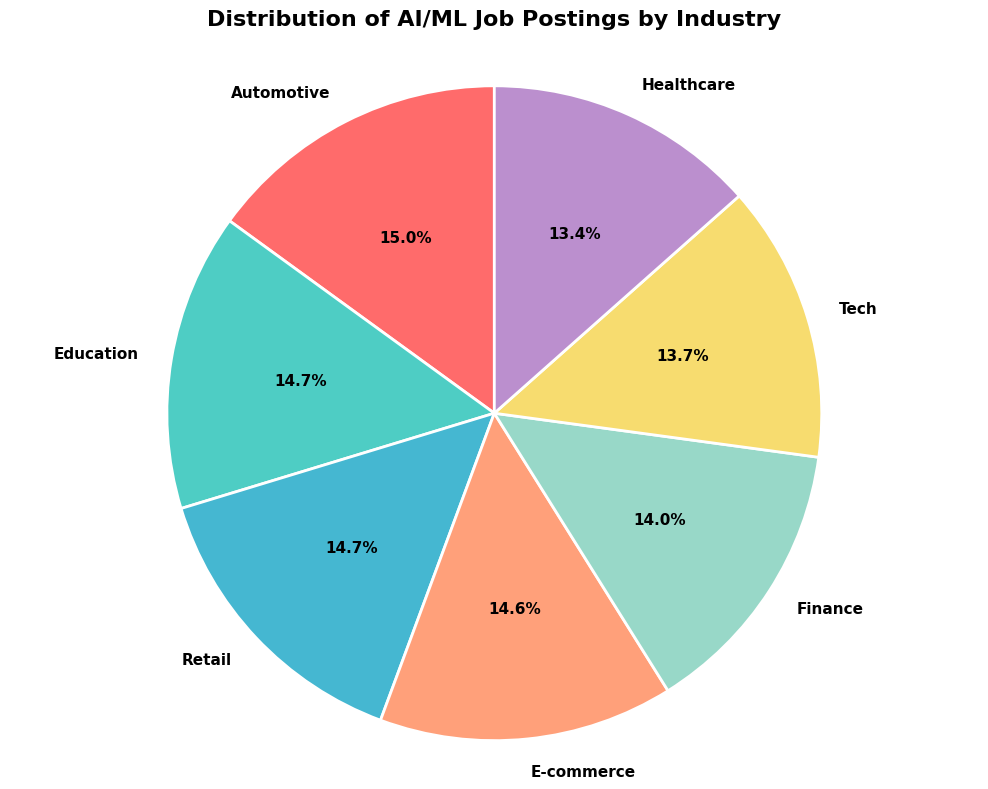

In [24]:
#Which industries are hiring the most AI/ML professionals? Analyze the distribution of job postings across 
# different industry sectors (Tech, Healthcare, Finance, Automotive, Education, Retail, E-commerce). 
# Create a pie chart showing the percentage breakdown of postings by industry.


industry_counts=df['industry'].value_counts()
print(industry_counts)

plt.figure(figsize=(10,8))
colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
plt.pie(industry_counts,labels=industry_counts.index,
        autopct='%1.1f%%',startangle=90,colors=colors,
        textprops={'fontsize':11,'weight':'bold'},
        wedgeprops={'edgecolor':'white','linewidth':2})

plt.title('Distribution of AI/ML Job Postings by Industry',fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()


Entry     702
Mid       668
Senior    630
Name: experience_level, dtype: int64


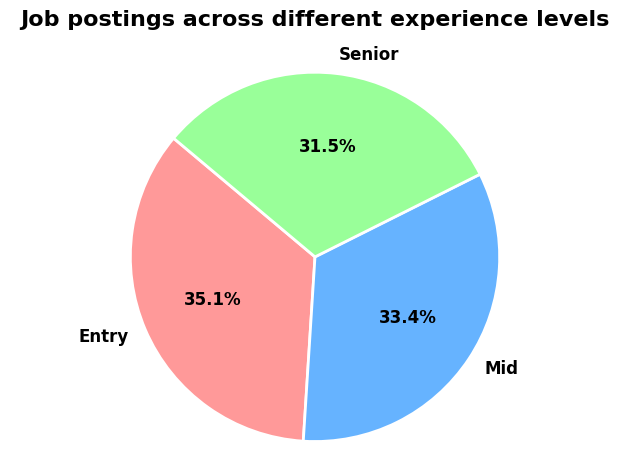

In [27]:
#What is the distribution of job postings across different experience levels (Entry-level, Mid-level, Senior)?  
# Create a pie chart showing the percentage distribution of experience levels.

exp_counts=df['experience_level'].value_counts()
print(exp_counts)

colors=['#FF9999', '#66B3FF', '#99FF99']
plt.pie(exp_counts,labels=exp_counts.index,
        autopct='%1.1f%%',startangle=140,colors=colors,
        textprops={'fontsize':12,'fontweight':'bold'},
        wedgeprops={'edgecolor':'white','linewidth':2})

plt.title('Job postings across different experience levels',fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [14]:
#Which employment types are most common? Compare Full-time, Remote, Contract, and Internship positions.

df['employment_type'].value_counts()

Internship    574
Full-time     509
Contract      465
Remote        452
Name: employment_type, dtype: int64

In [15]:
#What is the average salary range for each experience level? Do Senior positions earn significantly 
# more than Entry-level? (You'll need to extract min/max values from the salary_range_usd column)



df[['min_salary','max_salary']]=df['salary_range_usd'].str.split('-',expand=True)

df['min_salary']=df['min_salary'].astype(int)
df['max_salary']=df['max_salary'].astype(int)
df['avg_salary']=(df['min_salary']+df['max_salary'])/2
grouped=df.groupby('experience_level')
grouped_with_avgsalary=grouped.agg(
    avg_salary=('avg_salary','mean')
).round()

print(grouped_with_avgsalary)




                  avg_salary
experience_level            
Entry               123404.0
Mid                 121441.0
Senior              124329.0


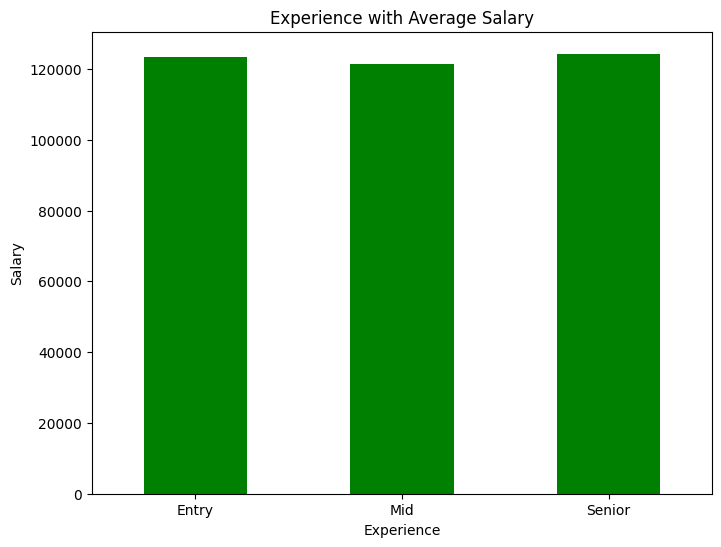

In [16]:
#Create a bar plot that visualizes the average salary for each experience level

grouped_with_avgsalary.plot(kind='bar',title='Experience with Average Salary',xlabel='Experience'
                            ,ylabel='Salary',figsize=(8,6),color='green',legend=False)
plt.xticks(rotation=0)
plt.show()

                          average_salary
job_title                               
NLP Engineer                    125308.0
Data Analyst                    125101.0
ML Engineer                     123954.0
Data Scientist                  123449.0
AI Researcher                   123231.0
Computer Vision Engineer        122881.0
Quant Researcher                120505.0
AI Product Manager              119715.0


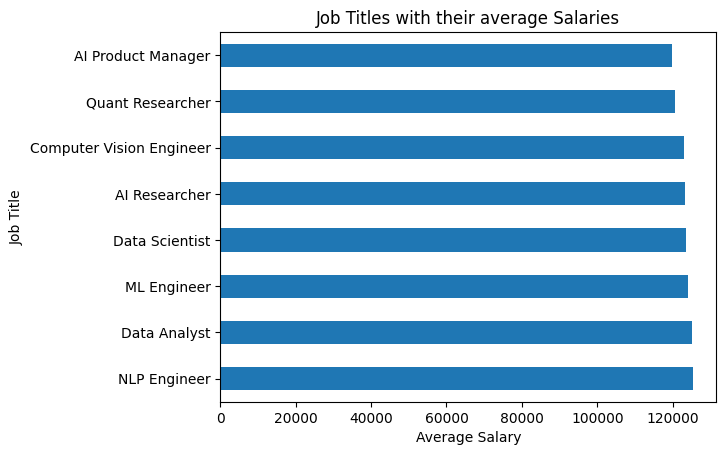

In [17]:
#Which job titles offer the highest salaries? Compare average salaries across Data Scientist, 
# ML Engineer, Quant Researcher, etc. Create a horizontal bar chart to visualize the top-paying roles.

grouped=df.groupby('job_title')
grouped_with_avgsalary=grouped.agg(
    average_salary=('avg_salary','mean')
).round()
grouped_with_avgsalary=grouped_with_avgsalary.sort_values(by=['average_salary'],ascending=False)
print(grouped_with_avgsalary)

grouped_with_avgsalary.plot(kind='barh',xlabel='Average Salary',ylabel='Job Title',
                            title='Job Titles with their average Salaries',legend=False)
plt.show()



              average_salary
company_size                
Large               124356.0
Startup             122606.0
Mid                 122186.0


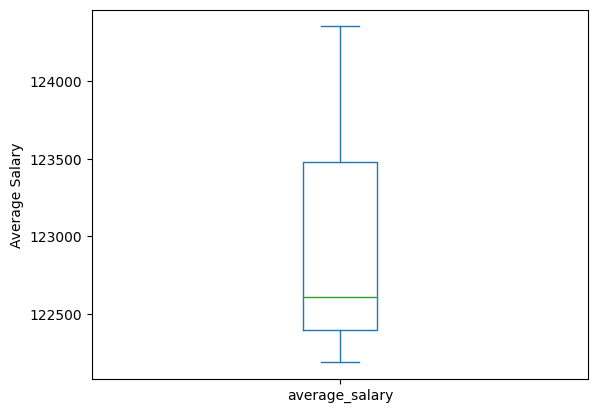

In [18]:
#Do larger companies pay more than startups? Compare salary distributions across company_size
#  (Large, Mid, Startup). Use a box plot to show the salary distribution for each company size.

grouped_with_avgsalary=df.groupby('company_size').agg(
    average_salary=('avg_salary','mean')
).round()
grouped_with_avgsalary=grouped_with_avgsalary.sort_values(by=['average_salary'],ascending=False)
print(grouped_with_avgsalary)
grouped_with_avgsalary.plot(kind='box',legend=True,ylabel='Average Salary')
plt.show()

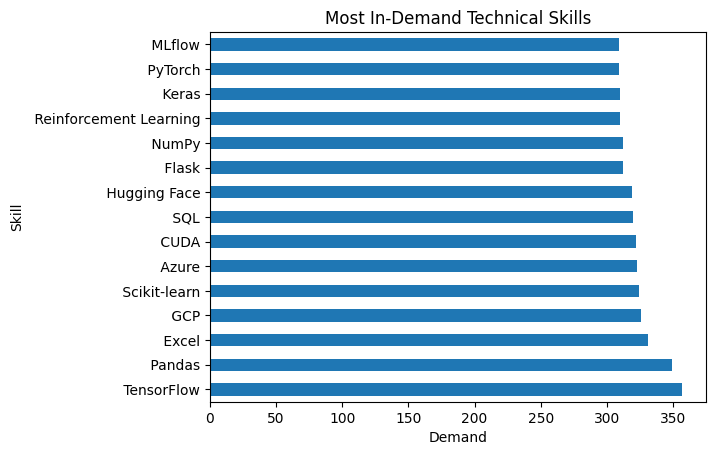

In [19]:
#What are the most in-demand technical skills? Which skills appear most frequently in 
# skills_required (Python, PyTorch, TensorFlow, SQL, etc.)? Create a horizontal bar chart showing the top 15 skills.

skills_list=df['skills_required'].str.split(',').explode()
skills_15=skills_list.value_counts().head(15)
skills_15
skills_15.plot(kind='barh', 
               xlabel='Demand', 
               ylabel='Skill', 
               title='Most In-Demand Technical Skills')
plt.show()


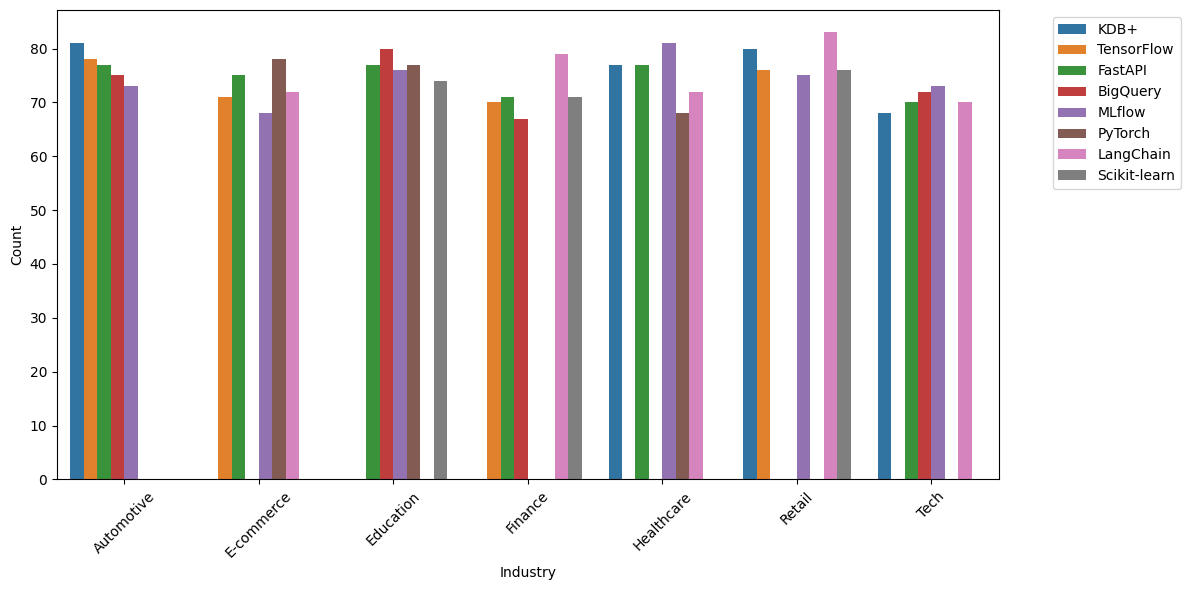

In [20]:
#Which tools are preferred by different industries? Do Tech companies prefer different tools (FastAPI, BigQuery, MLflow) compared to Healthcare or Finance?
#  Use a grouped bar chart to compare tool preferences across industries.



df_industry_tools=df[['industry','tools_preferred']]

df_industry_tools['tools_preferred']=df_industry_tools['tools_preferred'].str.split(',')
df_industry_tools=df_industry_tools.explode('tools_preferred')
df_industry_tools['tools_preferred']=df_industry_tools['tools_preferred'].str.strip()
grouped=df_industry_tools.groupby(['industry','tools_preferred']).size()


#size(): Counts the number of rows in each group (what you want!)​

# count(): Counts non-null values in each column, which can give different results if there are NaN values


grouped=grouped.reset_index()
grouped.columns=['industry','tools_preferred','count']
grouped=grouped.sort_values(by=['industry','count'],ascending=[True,False])
grouped
top_tools=grouped.groupby('industry').head(5)
top_tools

plt.figure(figsize=(12,6))
sns.barplot(data=top_tools,x='industry',y='count',hue='tools_preferred')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

0      2025-08-20
1      2024-03-22
2      2025-09-18
3      2024-08-05
4      2025-02-24
          ...    
1995   2024-04-22
1996   2023-02-12
1997   2023-10-29
1998   2024-10-08
1999   2025-02-20
Name: posted_date, Length: 2000, dtype: datetime64[ns]
   year  count
0  2023    271
1  2024   1006
2  2025    723


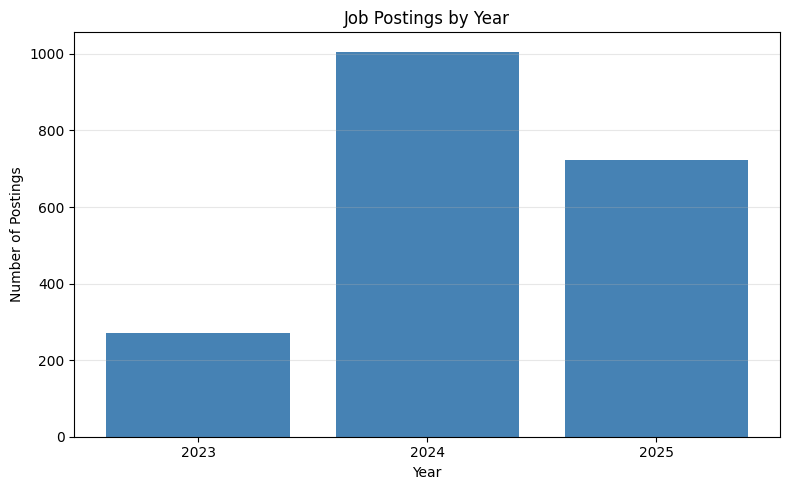

   year_month  count
0     2023-01      6
1     2023-02      4
2     2023-03     13
3     2023-04      7
4     2023-05      6
5     2023-06      9
6     2023-07     10
7     2023-08     10
8     2023-09     34
9     2023-10     59
10    2023-11     49
11    2023-12     64
12    2024-01     90
13    2024-02     74
14    2024-03     85
15    2024-04     75
16    2024-05     66
17    2024-06     68
18    2024-07     81
19    2024-08    113
20    2024-09     88
21    2024-10     94
22    2024-11     79
23    2024-12     93
24    2025-01     75
25    2025-02     66
26    2025-03     83
27    2025-04     73
28    2025-05     75
29    2025-06     70
30    2025-07     61
31    2025-08     83
32    2025-09     58
33    2025-10     26
34    2025-11     28
35    2025-12     25


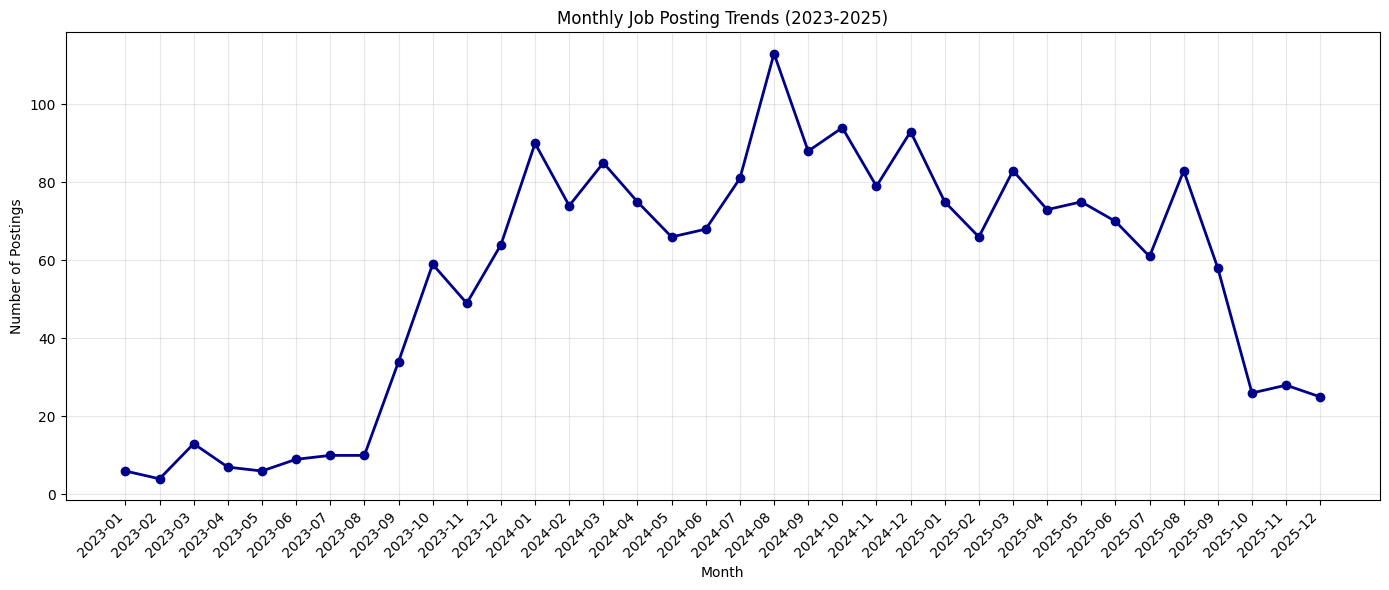

In [21]:
# How has job posting activity changed over time? Are there more postings in 2024-2025 compared to 2023?
#  Are certain months more active for hiring? Create a line plot showing monthly posting trends and a bar chart
#  comparing yearly totals.


# Convert posted_date to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])
print(df['posted_date'])
# Extract year
df['year'] = df['posted_date'].dt.year

# Extract year-month for monthly trends
df['year_month'] = df['posted_date'].dt.to_period('M')

# Count postings by year
yearly_counts = df.groupby('year').size().reset_index(name='count')
print(yearly_counts)

# Create bar chart for yearly totals
plt.figure(figsize=(8, 5))
plt.bar(yearly_counts['year'], yearly_counts['count'], color='steelblue')
plt.title('Job Postings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Postings')
plt.xticks(yearly_counts['year'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Count postings by month
monthly_counts = df.groupby('year_month').size().reset_index(name='count')

# Convert period back to string for plotting
monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)

print(monthly_counts)

# Create line plot for monthly trends
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['count'], 
         marker='o', linewidth=2, markersize=6, color='darkblue')
plt.title('Monthly Job Posting Trends (2023-2025)')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='both', alpha=0.3)
plt.tight_layout()
plt.show()



### Feature Engineering

In [22]:

# 1. SALARY FEATURES
df['salary_range'] = df['max_salary'] - df['min_salary']
df['salary_band'] = pd.cut(df['avg_salary'], 
                            bins=[0, 80000, 120000, 200000], 
                            labels=['Low', 'Medium', 'High'])
df['salary_flexibility'] = (df['salary_range'] / df['min_salary']) * 100

# 2. TIME FEATURES
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['quarter'] = df['posted_date'].dt.quarter
df['day_of_week'] = df['posted_date'].dt.day_name()



### Suggestions & Recommendations

1. Focus on High-Demand Roles

Observation: Data Analyst (271 postings), NLP Engineer (265), and AI Product Manager (258) dominate the job market.​

Recommendation:

Job seekers should prioritize developing skills relevant to these top roles

Companies should streamline hiring processes for these positions to stay competitive

2. Salary Optimization by Company Size

Observation: Large size companies pay more as opposed to Startups and Mid sized companies.

Recommendation:

Candidates should target companies of specific sizes for optimal compensation

Smaller companies may need to increase salaries to compete for top talent

3. Skills Gap Analysis

Observation: Tensorflow, Pandas, Excel, GCP and Scikit-learn are the top 5 most demanding technical skills. 
Recommendation:

Job seekers should prioritize learning the top 5-7 most requested technical skills

Training programs should align curricula with market demand

Companies should provide upskilling opportunities for existing employees

4. Industry-Specific Tool Preferences

Observation: Different industries show distinct tool preferences For Automotive Industry it's KDB, For E-commerce it's PyTorch etc

Recommendation:

Tech professionals should tailor their skillset based on target industries

Companies should standardize tools within their industry to attract qualified candidates

5. Hiring Trends Over Time

Observation: Job postings are declining over the years. The month of August shows a time where job posting tends to increase.

Recommendation:

Job seekers should time their applications during peak hiring months

Companies should plan hiring budgets around seasonal trends

